# Multi-layer Feed Forward Network Program on Text Dataset

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

# Load and Explore the Dataset
Load the breast cancer dataset from Sklearn and explore its structure and properties.

In [2]:
# Load the dataset
data = load_breast_cancer()

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first few rows of the DataFrame
print(df.head())

# Display the shape of the DataFrame
print('Shape of the DataFrame:', df.shape)

# Display the distribution of target variable
print('Distribution of target variable:')
print(df['target'].value_counts())

# Display basic statistics of the DataFrame
print(df.describe())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

# Preprocess the Data
Preprocess the data by normalizing it and splitting it into training and testing sets.

In [3]:
# Preprocess the Data
from sklearn.preprocessing import StandardScaler

# Separate the features and the target
X = df[data.feature_names]
y = df['target']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Implement Multi-layer Feed Forward Neural Network
Implement a multi-layer feed forward neural network using Sklearn's MLPClassifier.

In [4]:
# Define the model
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

# Train the model
mlp.fit(X_train, y_train)

# Predict the test set results
y_pred = mlp.predict(X_test)

# Print the score of the neural network
print('Score of the neural network: ', mlp.score(X_test, y_test))

Score of the neural network:  0.9649122807017544


# Experiment with Different Configurations and Activation Functions
Experiment with different configurations of the neural network and different activation functions to see how they affect the model's performance.

In [5]:
# Define different configurations and activation functions
configurations = [(30, 30, 30), (50, 50, 50), (100, 100, 100)]
activation_functions = ['identity', 'logistic', 'tanh', 'relu']

# Initialize a dictionary to store the results
results = {}

# Loop over the configurations and activation functions
for config in configurations:
    for activation in activation_functions:
        # Define the model with the current configuration and activation function
        mlp = MLPClassifier(hidden_layer_sizes=config, activation=activation, max_iter=1000, random_state=42)
        
        # Train the model
        mlp.fit(X_train, y_train)
        
        # Predict the test set results
        y_pred = mlp.predict(X_test)
        
        # Store the score of the model in the results dictionary
        results[(config, activation)] = mlp.score(X_test, y_test)

# Print the results
for key, value in results.items():
    print(f'Configuration: {key[0]}, Activation Function: {key[1]}, Score: {value}')

Configuration: (30, 30, 30), Activation Function: identity, Score: 0.9649122807017544
Configuration: (30, 30, 30), Activation Function: logistic, Score: 0.9824561403508771
Configuration: (30, 30, 30), Activation Function: tanh, Score: 0.9649122807017544
Configuration: (30, 30, 30), Activation Function: relu, Score: 0.9824561403508771
Configuration: (50, 50, 50), Activation Function: identity, Score: 0.9649122807017544
Configuration: (50, 50, 50), Activation Function: logistic, Score: 0.9824561403508771
Configuration: (50, 50, 50), Activation Function: tanh, Score: 0.9736842105263158
Configuration: (50, 50, 50), Activation Function: relu, Score: 0.9736842105263158
Configuration: (100, 100, 100), Activation Function: identity, Score: 0.9649122807017544
Configuration: (100, 100, 100), Activation Function: logistic, Score: 0.9736842105263158
Configuration: (100, 100, 100), Activation Function: tanh, Score: 0.9649122807017544
Configuration: (100, 100, 100), Activation Function: relu, Score:

# Evaluate the Model
Evaluate the performance of the model using various metrics, such as accuracy, precision, recall, and F1 score.

In [6]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize a dictionary to store the evaluation metrics
evaluation_metrics = {}

# Loop over the results
for key, value in results.items():
    # Define the model with the current configuration and activation function
    mlp = MLPClassifier(hidden_layer_sizes=key[0], activation=key[1], max_iter=1000, random_state=42)
    
    # Train the model
    mlp.fit(X_train, y_train)
    
    # Predict the test set results
    y_pred = mlp.predict(X_test)
    
    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store the evaluation metrics in the dictionary
    evaluation_metrics[key] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# Print the evaluation metrics
for key, value in evaluation_metrics.items():
    print(f'Configuration: {key[0]}, Activation Function: {key[1]}, Accuracy: {value["accuracy"]}, Precision: {value["precision"]}, Recall: {value["recall"]}, F1 Score: {value["f1"]}')

Configuration: (30, 30, 30), Activation Function: identity, Accuracy: 0.9649122807017544, Precision: 0.9855072463768116, Recall: 0.9577464788732394, F1 Score: 0.9714285714285714
Configuration: (30, 30, 30), Activation Function: logistic, Accuracy: 0.9824561403508771, Precision: 0.9859154929577465, Recall: 0.9859154929577465, F1 Score: 0.9859154929577465
Configuration: (30, 30, 30), Activation Function: tanh, Accuracy: 0.9649122807017544, Precision: 0.9855072463768116, Recall: 0.9577464788732394, F1 Score: 0.9714285714285714
Configuration: (30, 30, 30), Activation Function: relu, Accuracy: 0.9824561403508771, Precision: 0.9859154929577465, Recall: 0.9859154929577465, F1 Score: 0.9859154929577465
Configuration: (50, 50, 50), Activation Function: identity, Accuracy: 0.9649122807017544, Precision: 0.9855072463768116, Recall: 0.9577464788732394, F1 Score: 0.9714285714285714
Configuration: (50, 50, 50), Activation Function: logistic, Accuracy: 0.9824561403508771, Precision: 0.985915492957746

# Plot Confusion Matrix
Plot a confusion matrix to visualize the performance of the model in classifying the instances.

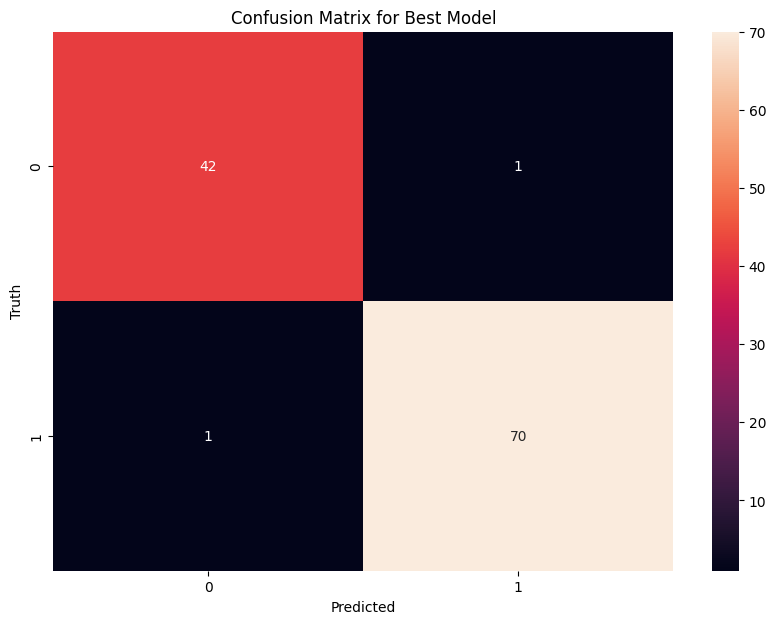

In [9]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Choose the best model from the evaluation metrics
best_model_key = max(evaluation_metrics, key=lambda x: evaluation_metrics[x]['f1'])
best_model = MLPClassifier(hidden_layer_sizes=best_model_key[0], activation=best_model_key[1], max_iter=1000, random_state=42)

# Train the best model
best_model.fit(X_train, y_train)

# Predict the test set results
y_pred = best_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for Best Model')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Visualize Results with Scatter Plots
Use scatter plots to visualize the results and understand the relationship between different variables.

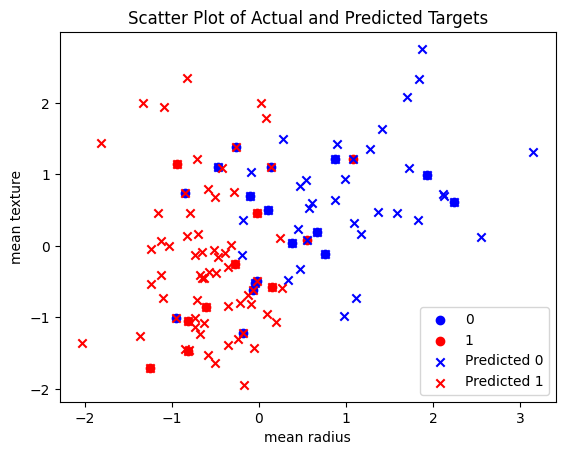

In [10]:
# Visualize Results with Scatter Plots
# We will visualize the results of the best model's predictions on the test set
# We will use the first two features for simplicity

# Predict the test set results
y_pred = best_model.predict(X_test)

# Create a DataFrame for easier manipulation
results_df = pd.DataFrame(X_test, columns=data.feature_names)
results_df['target'] = y_test
results_df['prediction'] = y_pred

# Plot the actual targets
plt.scatter(results_df[results_df['target'] == 0][data.feature_names[0]], results_df[results_df['target'] == 0][data.feature_names[1]], color='b', label='0')
plt.scatter(results_df[results_df['target'] == 1][data.feature_names[0]], results_df[results_df['target'] == 1][data.feature_names[1]], color='r', label='1')

# Plot the predicted targets
plt.scatter(results_df[results_df['prediction'] == 0][data.feature_names[0]], results_df[results_df['prediction'] == 0][data.feature_names[1]], color='b', marker='x', label='Predicted 0')
plt.scatter(results_df[results_df['prediction'] == 1][data.feature_names[0]], results_df[results_df['prediction'] == 1][data.feature_names[1]], color='r', marker='x', label='Predicted 1')

# Set the title and labels
plt.title('Scatter Plot of Actual and Predicted Targets')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Perform Exploratory Data Analysis (EDA)
Perform exploratory data analysis to understand the data better and gain insights that can help improve the model.

Missing values in each column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


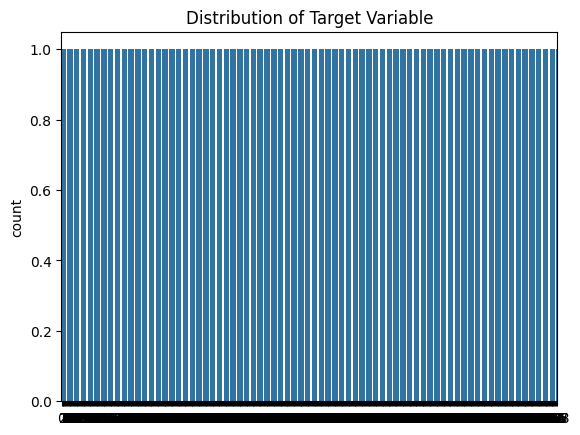

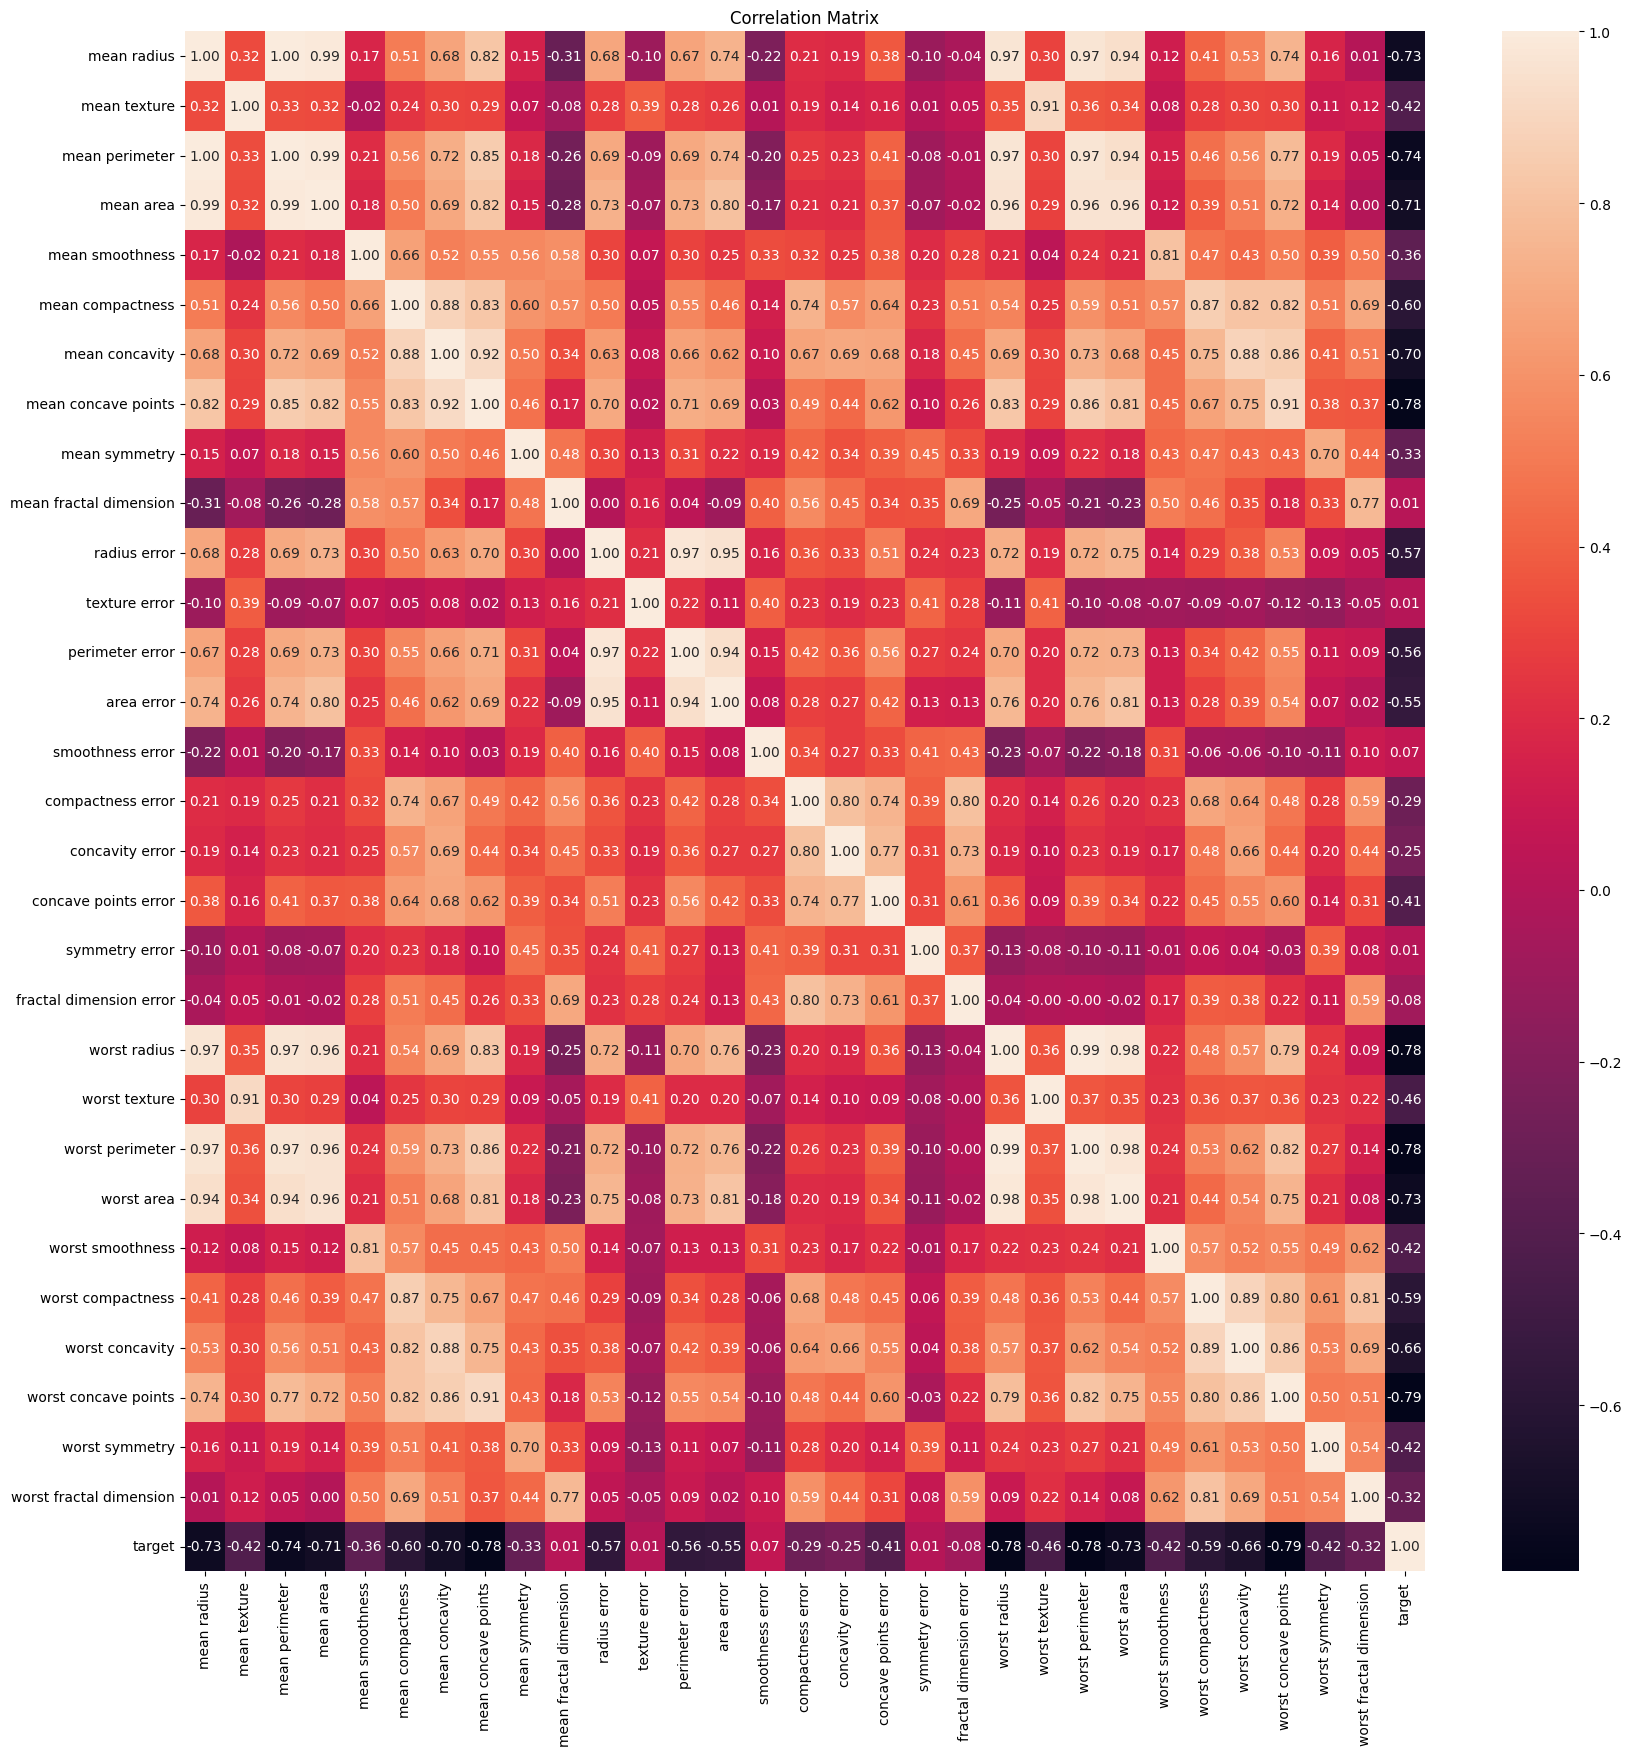

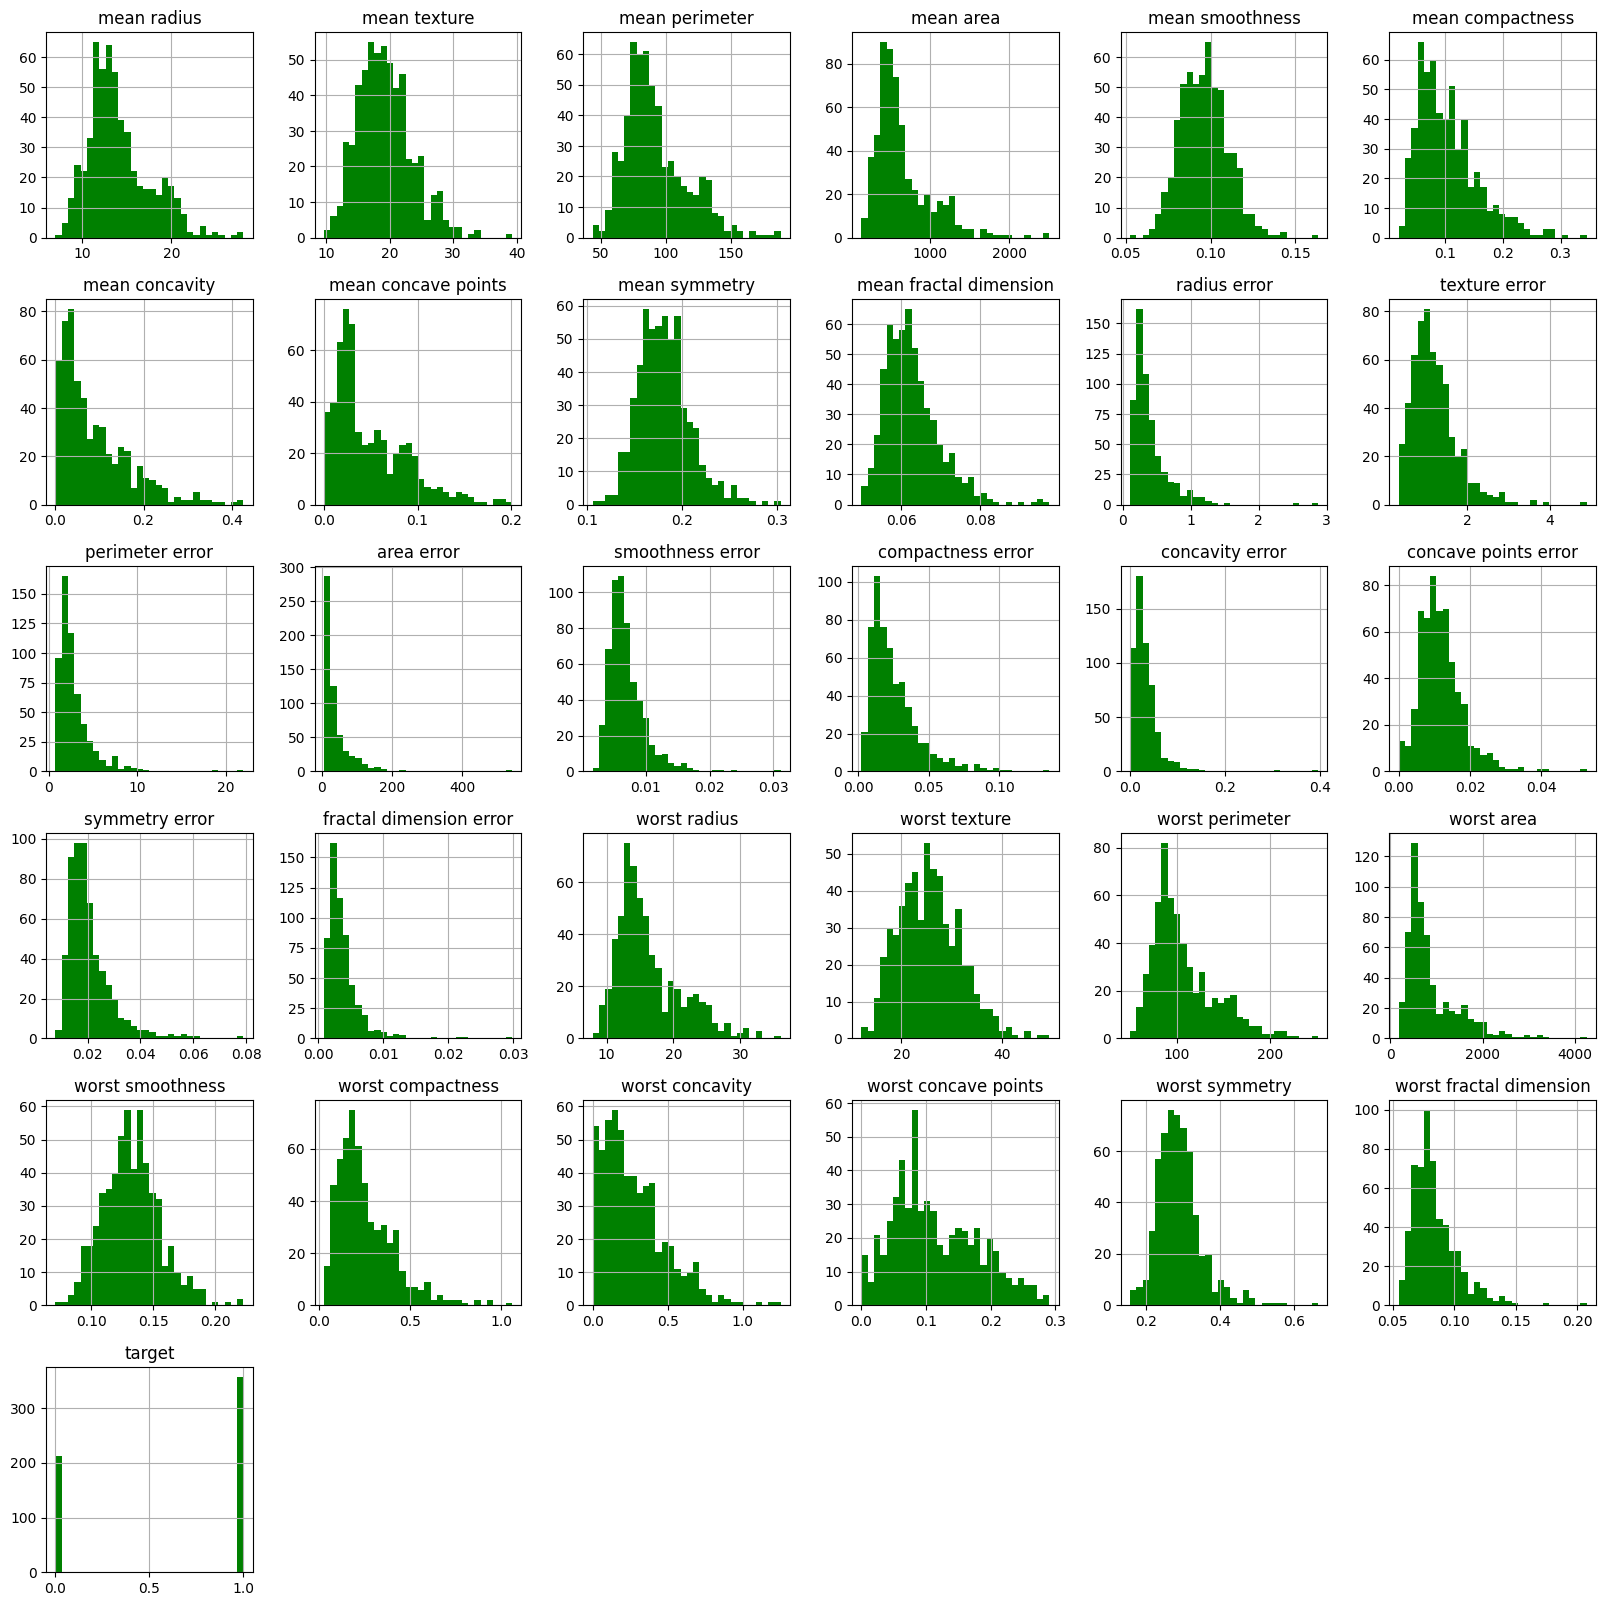

In [11]:
# Perform Exploratory Data Analysis (EDA)
import seaborn as sns

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Plot the distribution of the target variable
sns.countplot(df['target'])
plt.title('Distribution of Target Variable')
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Plot the distributions of the features
df.hist(bins=30, figsize=(20, 20), color='g')
plt.show()